<a href="https://colab.research.google.com/github/Vilash/6S191/blob/main/6S191Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We build a CNN model to classify handwritten digits 
- there are 60000 training samples
- 10000 testing samples
- classes are digits between 0-9
- each image is 28x28 grayscale image

In [14]:
import functools

In [2]:
import tensorflow as tf
!pip install mitdeeplearning
import mitdeeplearning as mdl


import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm



     |████████████████████████████████| 2.1 MB 7.4 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=dc2387cdbbe83916b723b196bade965ebd6283a86280d5e450148697f5b0209e
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [3]:
assert len(tf.config.list_physical_devices('GPU')) > 0

**Visualize**

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:


train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)

test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [25]:
train_images.shape
# print(train_labels[1])

(60000, 28, 28, 1)

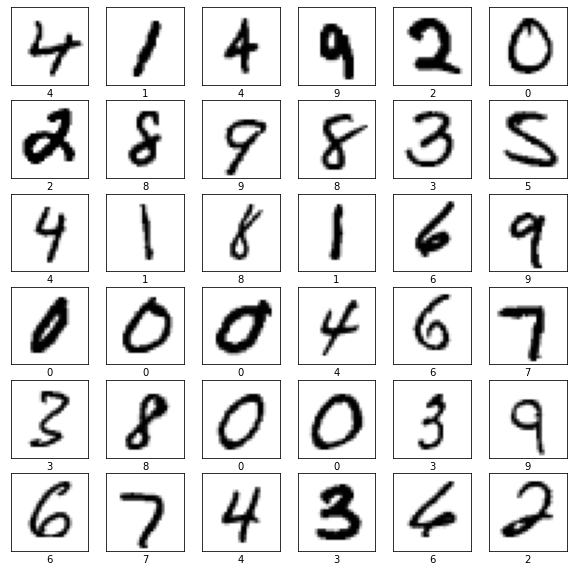

In [8]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36)

for i in range(36):
  plt.subplot(6,6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

**Fully Connected Neural Network**

In [9]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                       tf.keras.layers.Flatten(),
                       tf.keras.layers.Dense(128, activation=tf.nn.relu),
                       tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2),
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
                                               )

In [11]:
BATCH_SIZE=16
EPOCHS=20

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
3750/3750 [==============================] - 11s 2ms/step - loss: 0.4987 - accuracy: 0.8697
Epoch 2/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2691 - accuracy: 0.9251
Epoch 3/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2206 - accuracy: 0.9376
Epoch 4/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1892 - accuracy: 0.9467
Epoch 5/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1667 - accuracy: 0.9526
Epoch 6/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1493 - accuracy: 0.9583
Epoch 7/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1356 - accuracy: 0.9616
Epoch 8/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1242 - accuracy: 0.9656
Epoch 9/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1147 - accuracy: 0.9681
Epoch 10/20
3750/3750 [==============================] - 8s 2ms/step - loss: 0.10

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9765


**CNN for Handwritten Digit Classification**

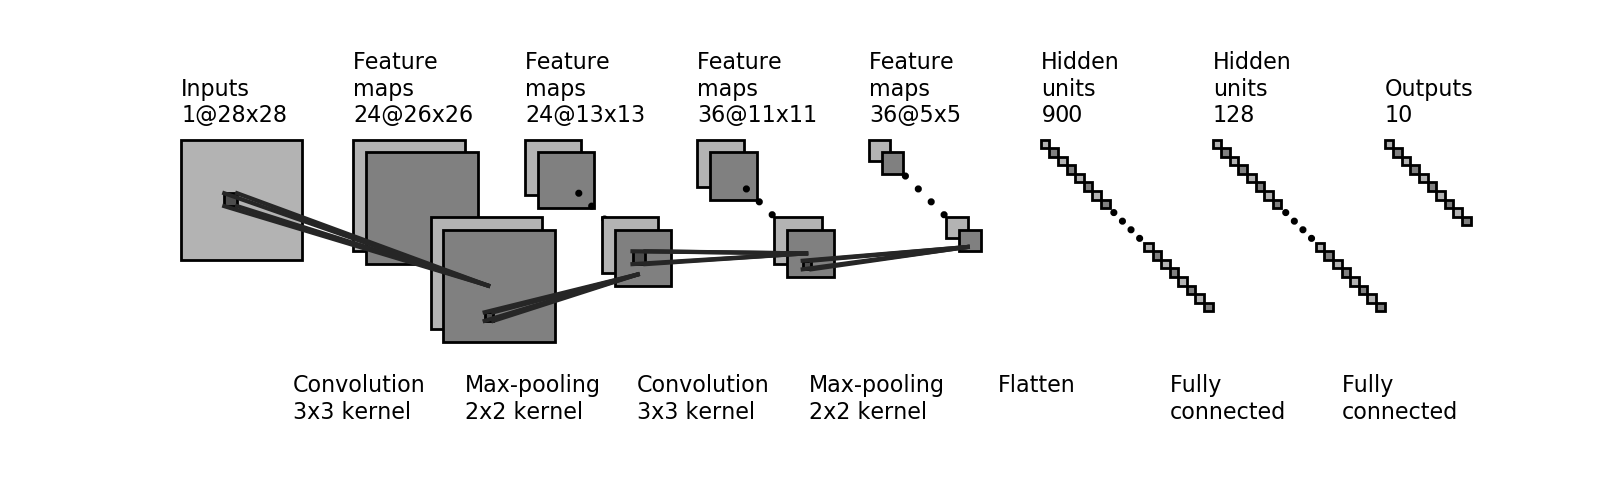

**Build the Model**

In [13]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
# CNN Layer1
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
# CNN Layer2
    tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(), 

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  ])
  return cnn_model

cnn_model = build_cnn_model()



**Train**

In [14]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss      = 'sparse_categorical_crossentropy',
                  metrics   = ['accuracy']
                  )
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
3750/3750 [==============================] - 43s 4ms/step - loss: 0.1176 - accuracy: 0.9637
Epoch 2/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0432 - accuracy: 0.9871
Epoch 3/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 4/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 6/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 7/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 8/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 9/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/20
3750/3750 [==============================] - 15s 4ms/step - l

In [15]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9909
Test accuracy: 0.9908999800682068


In [16]:
predictions = cnn_model.predict(test_images)

In [17]:
predictions[0].shape

(10,)

Prediction is:  7
Label is:  7


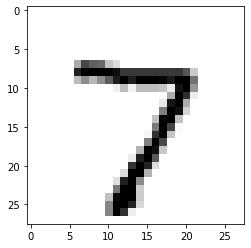

In [18]:
prediction = np.argmax(predictions[0])

print("Prediction is: ",prediction)
print("Label is: ",test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)


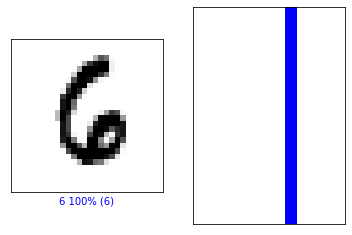

In [19]:
image_index = 81
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

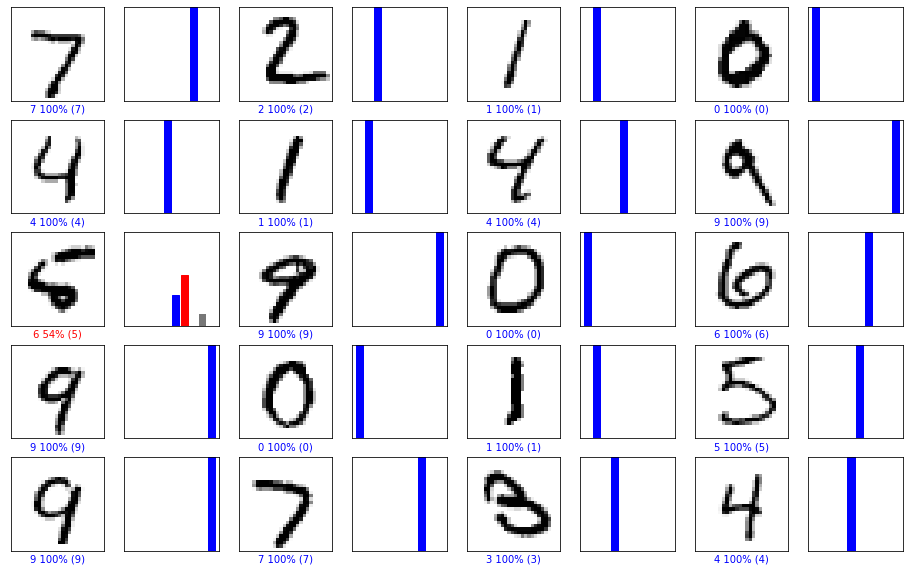

In [20]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

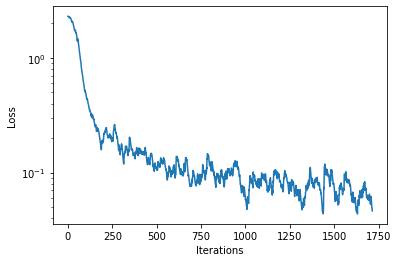

100%|██████████| 1765/1765 [00:27<00:00, 64.81it/s]


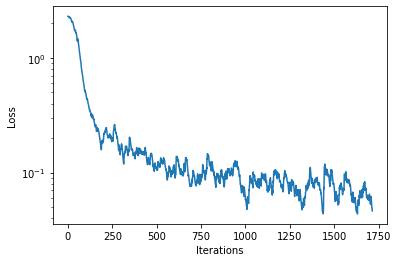

In [31]:
# Rebuild CNN Model
cnn_model = build_cnn_model()

batch_size    = 34
loss_history  = mdl.util.LossHistory(smoothing_factor=0.95)
plotter       = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer     = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'):
  tqdm._instances.clear()         #clear tqdm instances if they exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # convert input batch to training tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    if idx == 0: print(logits, "\n") 

    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
  
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))


# **Debiasing Facial Detection System**


In [31]:
import IPython
# IPython.display.YouTubeVideo('59bMh59JQDo')

In [7]:
import functools

In [3]:
path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
loader = mdl.lab2.TrainingDatasetLoader(path_to_training_data)


1263902720/1263889489 [==============================] - 17s 0us/step
Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [8]:
number_of_training_examples = loader.get_train_size()
(images, labels) = loader.get_batch(100)

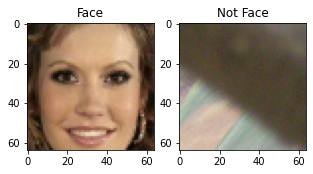

In [9]:
face_images = images[np.where(labels==1)[0]]
not_face_images = images[np.where(labels==0)[0]]

idx_face = 23
idx_not_face = 6


plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(face_images[idx_face])
plt.title("Face")
plt.grid(False)

plt.subplot(1,2,2)
plt.imshow(not_face_images[idx_not_face])
plt.title("Not Face")
plt.grid(False)


**Standard Classifier**

In [10]:
n_filters = 12

def make_standard_classifier(n_outputs=1):
  Conv2D = functools.partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
  BatchNormalization = tf.keras.layers.BatchNormalization

  Flatten = tf.keras.layers.Flatten
  Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

  model = tf.keras.Sequential([
    Conv2D(filters=1*n_filters, kernel_size=5, strides=2),
    BatchNormalization(),

    Conv2D(filters=2*n_filters, kernel_size=5, strides=2),
    BatchNormalization(),

    Conv2D(filters=4*n_filters, kernel_size=5, strides=2),
    BatchNormalization(),

    Conv2D(filters=6*n_filters, kernel_size=5, strides=2),
    BatchNormalization(),

    Flatten(),
    Dense(512),
    Dense(n_outputs, activation=None)
  ])
  return model  

standard_classifier = make_standard_classifier()



**Train CNN**

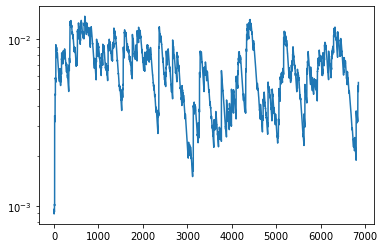

100%|██████████| 3434/3434 [05:11<00:00, 11.02it/s]


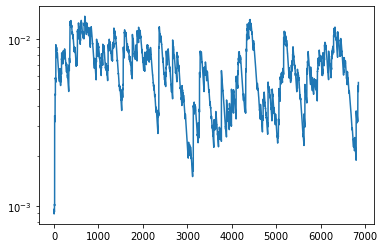

In [13]:
num_epochs = 2
batch_size = 32
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_history = mdl.util.LossHistory(smoothing_factor=0.99)
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

def standard_train_step(x,y):
  with tf.GradientTape() as tape:
    logits = standard_classifier(x)
    loss =  tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

# Backpropagation
  grads = tape.gradient(loss, standard_classifier.trainable_variables)
  optimizer.apply_gradients(zip(grads, standard_classifier.trainable_variables))
  return loss

for epoch in range(num_epochs):
  for idx in tqdm(range(loader.get_train_size()//batch_size)):
    x, y = loader.get_batch(batch_size)
    loss = standard_train_step(x,y)

    loss_history.append(loss.numpy().mean())
    plotter.plot(loss_history.get())

In [16]:
(batch_x, batch_y) = loader.get_batch(5000)

y_pred_standard = tf.round(tf.nn.sigmoid(standard_classifier.predict(batch_x)))

acc_standard = tf.reduce_mean(tf.cast(tf.equal(batch_y, y_pred_standard), tf.float32))

print("Accuracy on biased training set: {:.4f}".format(acc_standard.numpy()))

Accuracy on biased training set: 0.9980


**Testing**

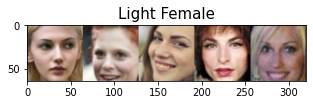

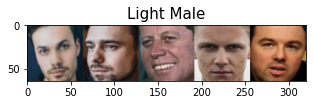

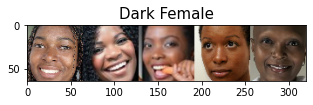

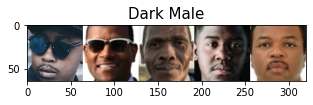

In [18]:
test_faces = mdl.lab2.get_test_faces()
keys = ["Light Female", "Light Male", "Dark Female", "Dark Male"]
for group, key in zip(test_faces, keys):
  plt.figure(figsize=(5,5))
  plt.imshow(np.hstack(group))
  plt.title(key, fontsize=15)

Text(0.5, 1.0, 'Standard Classifier Predictions')

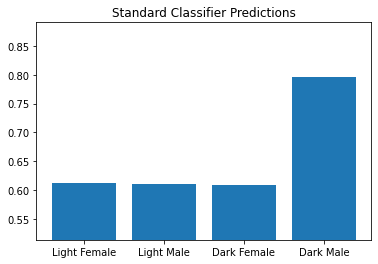

In [20]:
standard_classifier_logits = [standard_classifier(np.array(x, dtype=np.float32)) for x in test_faces]
standard_classifier_probs = tf.squeeze(tf.sigmoid(standard_classifier_logits))

xx = range(len(keys))
yy = standard_classifier_probs.numpy().mean(1)
plt.bar(xx,yy)
plt.xticks(xx, keys)
plt.ylim(max(0, yy.min()-yy.ptp()/2.), yy.max()+yy.ptp()/2.)
plt.title("Standard Classifier Predictions")

# **Mitigating algorithmic bias**

Imbalances in the training data can result in unwanted algorithmic bias. For example, the majority of faces in CelebA (our training set) are those of light-skinned females. As a result, a classifier trained on CelebA will be better suited at recognizing and classifying faces with features similar to these, and will thus be biased.

How could we overcome this? A naive solution -- and one that is being adopted by many companies and organizations -- would be to annotate different subclasses (i.e., light-skinned females, males with hats, etc.) within the training data, and then manually even out the data with respect to these groups.

But this approach has two major disadvantages. First, it requires annotating massive amounts of data, which is not scalable. Second, it requires that we know what potential biases (e.g., race, gender, pose, occlusion, hats, glasses, etc.) to look for in the data. As a result, manual annotation may not capture all the different features that are imbalanced within the training data.

Instead, let's actually learn these features in an unbiased, unsupervised manner, without the need for any annotation, and then train a classifier fairly with respect to these features. In the rest of this lab, we'll do exactly that.

# **Variational autoencoder (VAE)**
for learning latent structure

As you saw, the accuracy of the CNN varies across the four demographics we looked at. To think about why this may be, consider the dataset the model was trained on, CelebA. If certain features, such as dark skin or hats, are rare in CelebA, the model may end up biased against these as a result of training with a biased dataset. That is to say, its classification accuracy will be worse on faces that have under-represented features, such as dark-skinned faces or faces with hats, relevative to faces with features well-represented in the training data! This is a problem.

Our goal is to train a debiased version of this classifier -- one that accounts for potential disparities in feature representation within the training data. Specifically, to build a debiased facial classifier, we'll train a model that learns a representation of the underlying latent space to the face training data. The model then uses this information to mitigate unwanted biases by sampling faces with rare features, like dark skin or hats, more frequently during training. The key design requirement for our model is that it can learn an encoding of the latent features in the face data in an entirely unsupervised way. To achieve this, we'll turn to variational autoencoders (VAEs).

VAEs rely on an encoder-decoder structure to learn a latent representation of the input data. In the context of computer vision, the encoder network takes in input images, encodes them into a series of variables defined by a mean and standard deviation, and then draws from the distributions defined by these parameters to generate a set of sampled latent variables. The decoder network then "decodes" these variables to generate a reconstruction of the original image, which is used during training to help the model identify which latent variables are important to learn.

Let's formalize two key aspects of the VAE model and define relevant functions for each.

**Understanding VAEs: loss function**

In practice, how can we train a VAE? 

In learning the latent space, we constrain the means and standard deviations to approximately follow a unit Gaussian. Recall that these are learned parameters, and therefore must factor into the loss computation, and that the decoder portion of the VAE is using these parameters to output a reconstruction that should closely match the input image, which also must factor into the loss. What this means is that we'll have two terms in our VAE loss function:

Latent loss ($L_{KL}$): measures how closely the learned latent variables match a unit Gaussian and is defined by the Kullback-Leibler (KL) divergence.
Reconstruction loss ($L_{x}{(x,\hat{x})}$): measures how accurately the reconstructed outputs match the input and is given by the $L^1$ norm of the input image and its reconstructed output.
The equation for the latent loss is provided by:

$$L_{KL}(\mu, \sigma) = \frac{1}{2}\sum_{j=0}^{k-1} (\sigma_j + \mu_j^2 - 1 - \log{\sigma_j})$$
The equation for the reconstruction loss is provided by:

$$L_{x}{(x,\hat{x})} = ||x-\hat{x}||_1$$
Thus for the VAE loss we have:

$$L_{VAE} = c\cdot L_{KL} + L_{x}{(x,\hat{x})}$$
where $c$ is a weighting coefficient used for regularization. Now we're ready to define our VAE loss function:

In [33]:
''' Function to calculate VAE loss given:
      an input x, 
      reconstructed output x_recon, 
      encoded means mu, 
      encoded log of standard deviation logsigma, 
      weight parameter for the latent loss kl_weight
'''

def vae_loss_function(x, x_recon, mu, logsigma, kl_weight=0.00005):
  latent_loss = tf.reduce_sum(tf.exp(logsigma) + tf.square(mu) - 1 - logsigma)

  reconstruction_loss = tf.reduce_mean(tf.abs(x - x_recon), axis=(1,2,3))

  vae_loss = kl_weight * latent_loss + reconstruction_loss

  return vae_loss



VAEs use a "reparameterization trick" for sampling learned latent variables. Instead of the VAE encoder generating a single vector of real numbers for each latent variable, it generates a vector of means and a vector of standard deviations that are constrained to roughly follow Gaussian distributions. We then sample from the standard deviations and add back the mean to output this as our sampled latent vector. Formalizing this for a latent variable $z$ where we sample $\epsilon \sim \mathcal{N}(0,(I))$ we have:

$$z = \mu + e^{\left(\frac{1}{2} \cdot \log{\Sigma}\right)}\circ \epsilon$$
where $\mu$ is the mean and $\Sigma$ is the covariance matrix. This is useful because it will let us neatly define the loss function for the VAE, generate randomly sampled latent variables, achieve improved network generalization, and make our complete VAE network differentiable so that it can be trained via backpropagation. Quite powerful!

In [22]:
def sampling(z_mean, z_logsigma):
  batch, latent = z_mean.shape
  epsilon = tf.random.normal(shape=(batch, latent_dim))
  z = z_mean + tf.exp(0.5 * z_logsigma) * epsilon

  return z




# **The DB-VAE model**

The key idea behind this debiasing approach is to use the latent variables learned via a VAE to adaptively re-sample the CelebA data during training. Specifically, we will alter the probability that a given image is used during training based on how often its latent features appear in the dataset. So, faces with rarer features (like dark skin, sunglasses, or hats) should become more likely to be sampled during training, while the sampling probability for faces with features that are over-represented in the training dataset should decrease (relative to uniform random sampling across the training data).

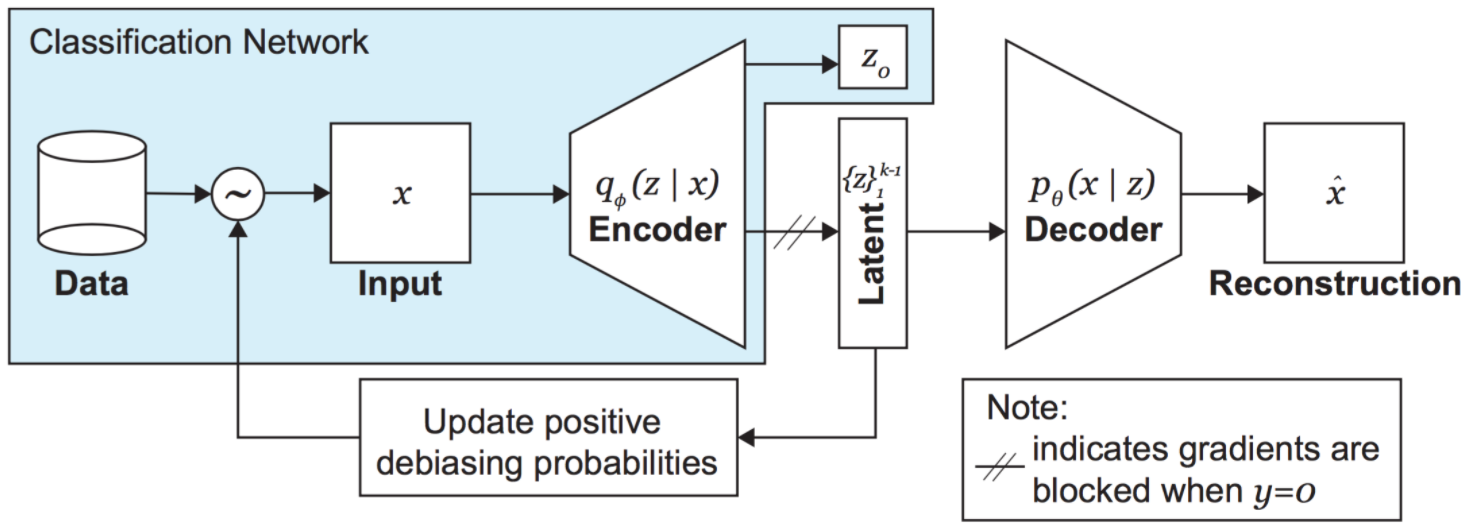

Recall that we want to apply our DB-VAE to a supervised classification problem -- the facial detection task. Importantly, note how the encoder portion in the DB-VAE architecture also outputs a single supervised variable, $z_o$, corresponding to the class prediction -- face or not face. Usually, VAEs are not trained to output any supervised variables (such as a class prediction)! This is another key distinction between the DB-VAE and a traditional VAE.

Keep in mind that we only want to learn the latent representation of faces, as that's what we're ultimately debiasing against, even though we are training a model on a binary classification problem. We'll need to ensure that, for faces, our DB-VAE model both learns a representation of the unsupervised latent variables, captured by the distribution $q_\phi(z|x)$, and outputs a supervised class prediction $z_o$, but that, for negative examples, it only outputs a class prediction $z_o$.

Defining the DB-VAE loss function
This means we'll need to be a bit clever about the loss function for the DB-VAE. The form of the loss will depend on whether it's a face image or a non-face image that's being considered.

For face images, our loss function will have two components:

VAE loss ($L_{VAE}$): consists of the latent loss and the reconstruction loss.
Classification loss ($L_y(y,\hat{y})$): standard cross-entropy loss for a binary classification problem.
In contrast, for images of non-faces, our loss function is solely the classification loss.

We can write a single expression for the loss by defining an indicator variable $\mathcal{I}_f$which reflects which training data are images of faces ($\mathcal{I}_f(y) = 1$ ) and which are images of non-faces ($\mathcal{I}_f(y) = 0$). Using this, we obtain:

$$L_{total} = L_y(y,\hat{y}) + \mathcal{I}_f(y)\Big[L_{VAE}\Big]$$

In [21]:
"""Loss function for DB-VAE.
# Arguments
    x: true input x
    x_pred: reconstructed x
    y: true label (face or not face)
    y_logit: predicted labels
    mu: mean of latent distribution (Q(z|X))
    logsigma: log of standard deviation of latent distribution (Q(z|X))
# Returns
    total_loss: DB-VAE total loss
    classification_loss = DB-VAE classification loss
"""

def debiasing_loss_function(x, x_pred, y, y_logit, mu, logsigma):
  vae_loss = vae_loss_function(x, x_pred, mu, logsigma)

  classification_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_logit)
  
  face_indicator = tf.cast(tf.equal(y, 1), tf.float32)

  total_loss = tf.reduce_mean(
      classification_loss + 
      face_indicator * vae_loss
  )
  return total_loss, classification_loss


In [26]:
n_filter = 12
latent_dim = 100

def make_face_decoder_network():
  Conv2DTranspose = functools.partial(tf.keras.layers.Conv2DTranspose, padding='same', activation='relu')
  BatchNormalization =  tf.keras.layers.BatchNormalization
  Flatten = tf.keras.layers.Flatten
  Dense = functools.partial(tf.keras.layers.Dense)
  Reshape = tf.keras.layers.Reshape

  decoder = tf.keras.Sequential([
                                 Dense(units=4*4*6*n_filters),
                                 Reshape(target_shape=(4,4,6*n_filters)),

                                 Conv2DTranspose(filters=4*n_filters, kernel_size=3, strides=2),
                                 Conv2DTranspose(filters=2*n_filters, kernel_size=3, strides=2),
                                 Conv2DTranspose(filters=1*n_filters, kernel_size=3, strides=2),
                                 Conv2DTranspose(filters=3, kernel_size=3, strides=2),                                 
  ])

  return decoder


In [27]:
class DB_VAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super(DB_VAE, self).__init__()
    self.latent_dim = latent_dim

    # Define the number of outputs for the encoder. Recall that we have 
    # `latent_dim` latent variables, as well as a supervised output for the 
    # classification.
    num_encoder_dims = 2*self.latent_dim + 1

    self.encoder = make_standard_classifier(num_encoder_dims)
    self.decoder = make_face_decoder_network()

  # function to feed images into encoder, encode the latent space, and output
  #   classification probability 
  def encode(self, x):
    # encoder output
    encoder_output = self.encoder(x)

    # classification prediction
    y_logit = tf.expand_dims(encoder_output[:, 0], -1)
    # latent variable distribution parameters
    z_mean = encoder_output[:, 1:self.latent_dim+1] 
    z_logsigma = encoder_output[:, self.latent_dim+1:]

    return y_logit, z_mean, z_logsigma

  # VAE reparameterization: given a mean and logsigma, sample latent variables
  def reparameterize(self, z_mean, z_logsigma):
    # TODO: call the sampling function defined above
    z = sampling(z_mean, z_logsigma)
    # z = # TODO
    return z

  # Decode the latent space and output reconstruction
  def decode(self, z):
    # TODO: use the decoder to output the reconstruction
    reconstruction = self.decoder(z)
    # reconstruction = # TODO
    return reconstruction

  # The call function will be used to pass inputs x through the core VAE
  def call(self, x): 
    # Encode input to a prediction and latent space
    y_logit, z_mean, z_logsigma = self.encode(x)

    # TODO: reparameterization
    z = self.reparameterize(z_mean, z_logsigma)
    # z = # TODO

    # TODO: reconstruction
    recon = self.decode(z)
    # recon = # TODO
    return y_logit, z_mean, z_logsigma, recon

  # Predict face or not face logit for given input x
  def predict(self, x):
    y_logit, z_mean, z_logsigma = self.encode(x)
    return y_logit

dbvae = DB_VAE(latent_dim)

In [28]:
# Function to return the means for an input image batch
def get_latent_mu(images, dbvae, batch_size=1024):
  N = images.shape[0]
  mu = np.zeros((N, latent_dim))
  for start_ind in range(0, N, batch_size):
    end_ind = min(start_ind+batch_size, N+1)
    batch = (images[start_ind:end_ind]).astype(np.float32)/255.
    _, batch_mu, _ = dbvae.encode(batch)
    mu[start_ind:end_ind] = batch_mu
  return mu

In [29]:
### Resampling algorithm for DB-VAE ###

'''Function that recomputes the sampling probabilities for images within a batch
      based on how they distribute across the training data'''
def get_training_sample_probabilities(images, dbvae, bins=10, smoothing_fac=0.001): 
    print("Recomputing the sampling probabilities")
    
    # TODO: run the input batch and get the latent variable means
    mu = get_latent_mu(images, dbvae)
    # mu = get_latent_mu('''TODO''') # TODO

    # sampling probabilities for the images
    training_sample_p = np.zeros(mu.shape[0])
    
    # consider the distribution for each latent variable 
    for i in range(latent_dim):
      
        latent_distribution = mu[:,i]
        # generate a histogram of the latent distribution
        hist_density, bin_edges =  np.histogram(latent_distribution, density=True, bins=bins)

        # find which latent bin every data sample falls in 
        bin_edges[0] = -float('inf')
        bin_edges[-1] = float('inf')
        
        # TODO: call the digitize function to find which bins in the latent distribution 
        #    every data sample falls in to
        # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.digitize.html
        bin_idx = np.digitize(latent_distribution, bin_edges)
        # bin_idx = np.digitize('''TODO''', '''TODO''') # TODO

        # smooth the density function
        hist_smoothed_density = hist_density + smoothing_fac
        hist_smoothed_density = hist_smoothed_density / np.sum(hist_smoothed_density)

        # invert the density function 
        p = 1.0/(hist_smoothed_density[bin_idx-1])
        
        # TODO: normalize all probabilities
        p = p / np.sum(p)
        # p = # TODO
        
        # TODO: update sampling probabilities by considering whether the newly
        #     computed p is greater than the existing sampling probabilities.
        training_sample_p = np.maximum(p, training_sample_p)
        # training_sample_p = # TODO
        
    # final normalization
    training_sample_p /= np.sum(training_sample_p)

    return training_sample_p

Starting epoch 6/6
Recomputing the sampling probabilities


  0%|          | 0/3434 [00:00<?, ?it/s]

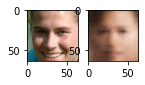

 15%|█▍        | 500/3434 [00:47<04:38, 10.54it/s]

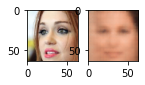

 29%|██▉       | 1000/3434 [01:35<03:56, 10.29it/s]

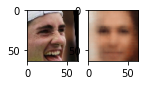

 44%|████▎     | 1500/3434 [02:25<03:26,  9.38it/s]

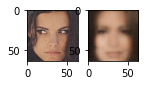

 58%|█████▊    | 2000/3434 [03:15<02:22, 10.08it/s]

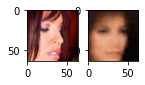

 73%|███████▎  | 2500/3434 [04:05<01:33,  9.95it/s]

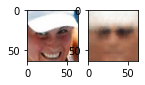

 87%|████████▋ | 3000/3434 [04:55<00:42, 10.14it/s]

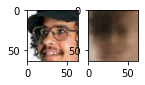

100%|██████████| 3434/3434 [05:38<00:00, 10.15it/s]


In [34]:
### Training the DB-VAE ###

# Hyperparameters
batch_size = 32
learning_rate = 5e-4
latent_dim = 100

# DB-VAE needs slightly more epochs to train since its more complex than 
# the standard classifier so we use 6 instead of 2
num_epochs = 6  

# instantiate a new DB-VAE model and optimizer
dbvae = DB_VAE(100)
optimizer = tf.keras.optimizers.Adam(learning_rate)

# To define the training operation, we will use tf.function which is a powerful tool 
#   that lets us turn a Python function into a TensorFlow computation graph.
@tf.function
def debiasing_train_step(x, y):

  with tf.GradientTape() as tape:
    # Feed input x into dbvae. Note that this is using the DB_VAE call function!
    y_logit, z_mean, z_logsigma, x_recon = dbvae(x)

    '''TODO: call the DB_VAE loss function to compute the loss'''
    loss, class_loss = debiasing_loss_function(x, x_recon, y, y_logit, z_mean, z_logsigma)
    # loss, class_loss = debiasing_loss_function('''TODO arguments''') # TODO
  
  '''TODO: use the GradientTape.gradient method to compute the gradients.
     Hint: this is with respect to the trainable_variables of the dbvae.'''
  grads = tape.gradient(loss, dbvae.trainable_variables)
  # grads = tape.gradient('''TODO''', '''TODO''') # TODO

  # apply gradients to variables
  optimizer.apply_gradients(zip(grads, dbvae.trainable_variables))
  return loss

# get training faces from data loader
all_faces = loader.get_all_train_faces()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

# The training loop -- outer loop iterates over the number of epochs
for i in range(num_epochs):

  IPython.display.clear_output(wait=True)
  print("Starting epoch {}/{}".format(i+1, num_epochs))

  # Recompute data sampling proabilities
  '''TODO: recompute the sampling probabilities for debiasing'''
  p_faces = get_training_sample_probabilities(all_faces, dbvae)
  # p_faces = get_training_sample_probabilities('''TODO''', '''TODO''') # TODO
  
  # get a batch of training data and compute the training step
  for j in tqdm(range(loader.get_train_size() // batch_size)):
    # load a batch of data
    (x, y) = loader.get_batch(batch_size, p_pos=p_faces)
    # loss optimization
    loss = debiasing_train_step(x, y)
    
    # plot the progress every 200 steps
    if j % 500 == 0: 
      mdl.util.plot_sample(x, y, dbvae)

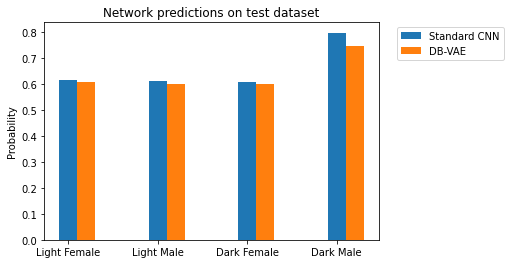

In [35]:
dbvae_logits = [dbvae.predict(np.array(x, dtype=np.float32)) for x in test_faces]
dbvae_probs = tf.squeeze(tf.sigmoid(dbvae_logits))

xx = np.arange(len(keys))
plt.bar(xx, standard_classifier_probs.numpy().mean(1), width=0.2, label="Standard CNN")
plt.bar(xx+0.2, dbvae_probs.numpy().mean(1), width=0.2, label="DB-VAE")
plt.xticks(xx, keys); 
plt.title("Network predictions on test dataset")
plt.ylabel("Probability"); plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");